<div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em"><font color="#475AFF">Correlation entre l'âge des clients et les catégories de produits achetés.</font>
</h1>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv('./DATA/cleaned/in_data.csv')
data.head()

,date,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
0,2021-03-01 00:01:07.843138,c_329,1967.0,0,f,0_1259,11.99,s_1,55.0,2021-03,2021-03-01
1,2021-03-01 00:02:26.047414,c_664,1960.0,0,m,0_1390,19.37,s_2,62.0,2021-03,2021-03-01
2,2021-03-01 00:02:38.311413,c_580,1988.0,0,m,0_1352,4.50,s_3,34.0,2021-03,2021-03-01
3,2021-03-01 00:04:54.559692,c_7912,1989.0,0,f,0_1458,6.55,s_4,33.0,2021-03,2021-03-01
4,2021-03-01 00:05:18.801198,c_2033,1956.0,0,f,0_1358,16.49,s_5,66.0,2021-03,2021-03-01


On veut étudier ici l'influence de l'age sur le choix de la categorie de produits achetés. </br>
On peut commencer par visualiser en affichant ces boîtes à moustaches :

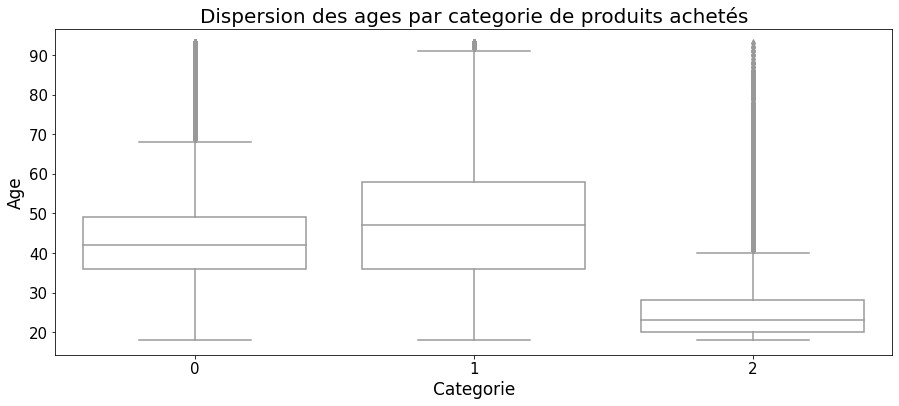

In [3]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.boxplot(x="categ", y="age", data=data, color='white',ax=ax)
#g.set(xlabel='Categorie',ylabel='Prix(€)')
plt.title('Dispersion des ages par categorie de produits achetés',fontsize="20")
plt.ylabel('Age',fontsize='17')
plt.xlabel('Categorie',fontsize="17")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()
fig.savefig('./GRAPHIQUES/correlation_age_categorie/Dispersion_des_age_par_categorie_de_produits_achetes.png',dpi=fig.dpi*10)
plt.close(fig)

Au regard des boites à moustache Les 3 categories semblent être assez différentes.</br>
La question sera de savoir si ces écarts sont significatifs ou pas.




### HYPOTHESE DE NORMALITE

### Normalite de la distribution des Ages

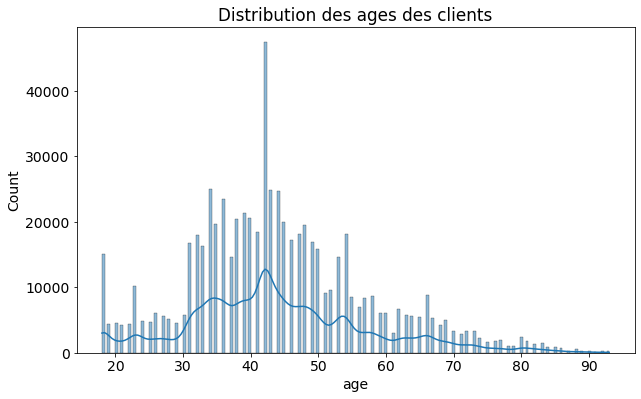

In [4]:
fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.histplot(data['age'],kde=True)
plt.title("Distribution des ages des clients")
plt.show()
fig.savefig('./GRAPHIQUES/correlation_age_categorie/Distribution des ages-categorieProduitsAchetes.png',dpi=fig.dpi*10)
plt.close(fig)

In [5]:
# shapiro-wilk test
# H0 : la distribution des ages suit une distribution normale
# H1 : la distribution des ages ne suit pas une distribution normale
res_shap=st.shapiro(data['age'])
print('statistic=%.3f, pvalue=%.3f' % (res_shap.statistic, res_shap.pvalue))

statistic=0.974, pvalue=0.000


C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des ages ne suit donc pas une distribution normale .

In [6]:
# kolmogorov-smirnov
# H0 : la distribution des ages suit une distribution normale
# H1 : la distribution des ages ne suit pas une distribution normale
rng = np.random.default_rng()
sample2 = st.norm.rvs(size=342, random_state=rng)
res = st.ks_2samp(data['age'], sample2,alternative='two-sided')
print('statistic=%.3f, pvalue=%.3f' % (res.statistic, res.pvalue))

statistic=1.000, pvalue=0.000


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des ages ne suit donc pas une distribution normale .

## Test de Kruskal-Wallis



H0: Les moyennes des categories $α_{0}=α_{1}=α_{2}=0$ . </br>
H1: Une ou plusieurs moyennes sont differentes

In [7]:
res_kruskal = st.kruskal(data['age'],data['categ'])
print('statistic=%.3f, pvalue=%.3f' % (res_kruskal.statistic, res_kruskal.pvalue))

statistic=1054255.335, pvalue=0.000




La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% .
On conclue que Âge des clients et la categorie de produits achetés sont
##### dependantes .


Les clients de moins de 30 ans achètent généralement les produits de categorie 2 ;Entre 30 et 40 ans les clients achètent les produits de categorie 1 et 2 . Les clients de plus de 50 ans achètent majoritairement des produits de categorie 2 . 

### MERCI DE VOTRE ATTENTION